# Heart Disease Detection Using Data Science Algorithms



In [3]:
# Description: This project is classifies whether a person has cardiovascular(heart)disease or not

In [4]:
#importing libraries
import numpy as np
import pandas as pd
import seaborn as sns

In [5]:
#loading dataset
from google.colab import files
uploaded = files.upload()

Saving cardio_train.csv to cardio_train (5).csv


In [6]:
#store data into a variable
df = pd.read_csv('cardio_train (5).csv',sep=';')

#print first 10 rows of the data
df.head(10)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
5,8,21914,1,151,67.0,120,80,2,2,0,0,0,0
6,9,22113,1,157,93.0,130,80,3,1,0,0,1,0
7,12,22584,2,178,95.0,130,90,3,3,0,0,1,1
8,13,17668,1,158,71.0,110,70,1,1,0,0,1,0
9,14,19834,1,164,68.0,110,60,1,1,0,0,0,0


In [7]:
#get shape of the data 
df.shape

(70000, 13)

In [8]:
df.isnull().values.any()

False

In [9]:
#view some basic statistics of data
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
#Count number of people with and without heart disease.
df['cardio'].value_counts()

0    35021
1    34979
Name: cardio, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


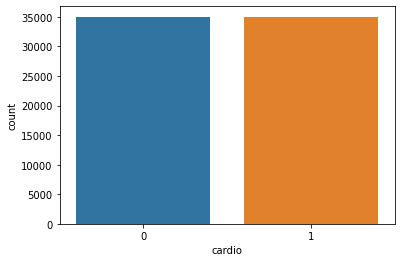

In [11]:
#visualizing the above count
sns.countplot(df['cardio']) 

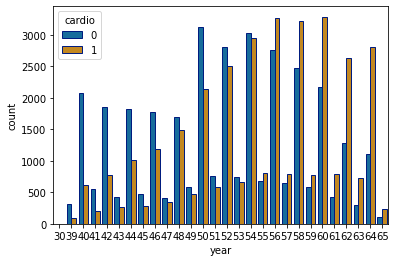

In [46]:
#look at the number of ppeople with heart disease that exceed the number of people without heart disease

#create a year column
df['year'] = (df['age']/365).round(0)
df['year'] = pd.to_numeric(df['year'], downcast = 'integer')

#visuaize the data
sns.countplot(x='year', hue='cardio', data=df, palette='colorblind', edgecolor=sns.color_palette('dark',n_colors=1))

In [47]:
#get correlation of the columns
df.corr()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,year
age,1.000000,-0.022811,-0.081515,0.053684,0.020764,0.017647,0.154424,0.098703,-0.047633,-0.029723,-0.009927,0.238159,0.999090
gender,-0.022811,1.000000,0.499033,0.155406,0.006005,0.015254,-0.035821,-0.020491,0.338135,0.170966,0.005866,0.008109,-0.023017
height,-0.081515,0.499033,1.000000,0.290968,0.005488,0.006150,-0.050226,-0.018595,0.187989,0.094419,-0.006570,-0.010821,-0.081456
weight,0.053684,0.155406,0.290968,1.000000,0.030702,0.043710,0.141768,0.106857,0.067780,0.067113,-0.016867,0.181660,0.053661
ap_hi,0.020764,0.006005,0.005488,0.030702,1.000000,0.016086,0.023778,0.011841,-0.000922,0.001408,-0.000033,0.054475,0.020793
ap_lo,0.017647,0.015254,0.006150,0.043710,0.016086,1.000000,0.024019,0.010806,0.005186,0.010601,0.004780,0.065719,0.017754
cholesterol,0.154424,-0.035821,-0.050226,0.141768,0.023778,0.024019,1.000000,0.451578,0.010354,0.035760,0.009911,0.221147,0.154386
gluc,0.098703,-0.020491,-0.018595,0.106857,0.011841,0.010806,0.451578,1.000000,-0.004756,0.011246,-0.006770,0.089307,0.098596
smoke,-0.047633,0.338135,0.187989,0.067780,-0.000922,0.005186,0.010354,-0.004756,1.000000,0.340094,0.025858,-0.015486,-0.047884
alco,-0.029723,0.170966,0.094419,0.067113,0.001408,0.010601,0.035760,0.011246,0.340094,1.000000,0.025476,-0.007330,-0.029918


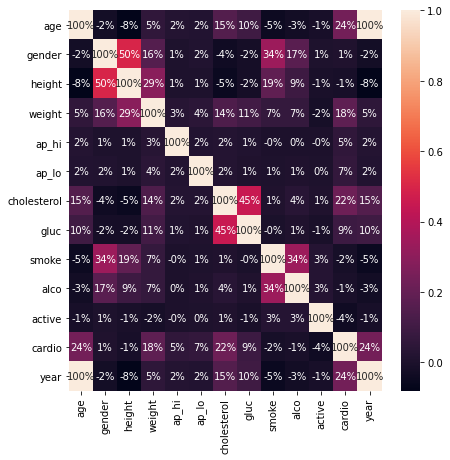

In [48]:
#visualizing the correlation of data by matplot
import matplotlib.pyplot as plt
plt.figure(figsize=(7,7))
sns.heatmap(df.corr(), annot = True, fmt ='.0%')

In [15]:
#remove or drop years column
df = df.drop('year', axis=1)

#remove or drop id column
df = df.drop('id', axis=1)

In [16]:
#split the data into independent features and dependent/target label
X = df.iloc[:, :-1].values
Y = df.iloc[:, -1].values

In [17]:
#split data into 75% training and 25% test data sets
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 1) 

In [18]:
#Feature Scaling:
#Scaling the value in the data to be values between 0 and 1 inclusive
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [21]:
def model01(X_train,Y_train):

  #Using SVC rbf
  from sklearn.svm import SVC
  svc_rbf = SVC(kernel = 'rbf', random_state = 1)
  svc_rbf.fit(X_train, Y_train)

  #print model accuracy on the training data.
  print('[1]Support Vector Machine (RBF Classifier) Training Accuracy:', svc_rbf.score(X_train, Y_train))
  return svc_rbf

In [22]:
model1 = model01(X_train,Y_train)

[1]Support Vector Machine (RBF Classifier) Training Accuracy: 0.7337904761904762


In [23]:
def model02(X_train,Y_train):

  #Using GaussianNB 
  from sklearn.naive_bayes import GaussianNB
  gauss = GaussianNB()
  gauss.fit(X_train, Y_train)

  #print model accuracy on the training data.
  print('[2]Gaussian Naive Bayes Training Accuracy:', gauss.score(X_train, Y_train))
  return gauss

In [24]:
model2 = model02(X_train,Y_train)

[2]Gaussian Naive Bayes Training Accuracy: 0.589695238095238


In [25]:
def model03(X_train,Y_train):

  #Using DecisionTreeClassifier 
  from sklearn.tree import DecisionTreeClassifier
  tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 1)
  tree.fit(X_train, Y_train)

  print('[3]Decision Tree Classifier Training Accuracy:', tree.score(X_train, Y_train))  
  return tree

In [26]:
model3 = model03(X_train,Y_train)

[3]Decision Tree Classifier Training Accuracy: 0.9998095238095238


In [27]:
def model04(X_train,Y_train):

  #Using RandomForestClassifier method of ensemble class to use Random Forest Classification algorithm
  from sklearn.ensemble import RandomForestClassifier
  forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 1)
  forest.fit(X_train, Y_train)
    
  #print model accuracy on the training data.
  print('[4]Random Forest Classifier Training Accuracy:', forest.score(X_train, Y_train))
  return forest

In [28]:
model4 = model04(X_train,Y_train)

[4]Random Forest Classifier Training Accuracy: 0.979904761904762


In [30]:
def models(X_train,Y_train):

  #Using SVC rbf
  from sklearn.svm import SVC
  svc_rbf = SVC(kernel = 'rbf', random_state = 1)
  svc_rbf.fit(X_train, Y_train)

  #Using GaussianNB 
  from sklearn.naive_bayes import GaussianNB
  gauss = GaussianNB()
  gauss.fit(X_train, Y_train)

  #Using DecisionTreeClassifier 
  from sklearn.tree import DecisionTreeClassifier
  tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 1)
  tree.fit(X_train, Y_train)

  #Using RandomForestClassifier method of ensemble class to use Random Forest Classification algorithm
  from sklearn.ensemble import RandomForestClassifier
  forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 1)
  forest.fit(X_train, Y_train)
  
  #print model accuracy on the training data.
  print('[3]Support Vector Machine (RBF Classifier) Training Accuracy:', svc_rbf.score(X_train, Y_train))
  print('[4]Gaussian Naive Bayes Training Accuracy:', gauss.score(X_train, Y_train))
  print('[5]Decision Tree Classifier Training Accuracy:', tree.score(X_train, Y_train))
  print('[6]Random Forest Classifier Training Accuracy:', forest.score(X_train, Y_train))
  
  return svc_rbf, gauss, tree, forest

In [32]:
model = models(X_train,Y_train)

[3]Support Vector Machine (RBF Classifier) Training Accuracy: 0.7337904761904762
[4]Gaussian Naive Bayes Training Accuracy: 0.589695238095238
[5]Decision Tree Classifier Training Accuracy: 0.9998095238095238
[6]Random Forest Classifier Training Accuracy: 0.979904761904762


In [33]:
from sklearn.metrics import confusion_matrix
for i in range(len(model)):
  cm = confusion_matrix(Y_test, model[i].predict(X_test))
  
  TN = cm[0][0]
  TP = cm[1][1]
  FN = cm[1][0]
  FP = cm[0][1]
  
  print(cm)
  print('Model[{}] Testing Accuracy = "{}!"'.format(i,  (TP + TN) / (TP + TN + FN + FP)))
  print()# Print a new line

[[6598 2011]
 [2771 6120]]
Model[0] Testing Accuracy = "0.7267428571428571!"

[[7736  873]
 [6477 2414]]
Model[1] Testing Accuracy = "0.58!"

[[5484 3125]
 [3288 5603]]
Model[2] Testing Accuracy = "0.6335428571428572!"

[[6487 2122]
 [3093 5798]]
Model[3] Testing Accuracy = "0.702!"



In [42]:
import pickle
model = model03(X_train,Y_train)
# save the model to disk
filename = 'finalized_model.sav'
pickle.dump(model, open(filename, 'wb'))

[3]Decision Tree Classifier Training Accuracy: 0.9998095238095238


In [43]:
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, Y_test)
print(result)

0.6335428571428572
